### Preprocessing (전처리)
- Data Cleansing: 데이터 정제, 누락된 결측치/중복값/이상치 처리
- Data Encoding: (e.g., Label Encoding) 텍스트 데이터 ---> 숫자로 변환 (범주형 데이터)
- Data Scaling: 숫자값 정규화, MinMaxScaler, ...
- Outlier: 이상치치
- FeatureEngineering: 속성 생성/수정/가공

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleansing

In [2]:
# 결측치 처리
from sklearn.impute import SimpleImputer

data = pd.DataFrame({
    "age": [20, 27, 21, 37, 46, None, 58, None, 22],
    "income": [10000, 40000, None, 50000, 20000, 10000, 50000, 20000, 10000]
})

imputer = SimpleImputer()
data_cleaned = pd.DataFrame(imputer.fit_transform(data)) # 결측치 처리 : 평균값으로 채워준다.
print(data_cleaned)

      0        1
0  20.0  10000.0
1  27.0  40000.0
2  21.0  26250.0
3  37.0  50000.0
4  46.0  20000.0
5  33.0  10000.0
6  58.0  50000.0
7  33.0  20000.0
8  22.0  10000.0


In [3]:
# 이상치 처리 IsolationForest
# - 트리기반 이상치탐지 기법 (알고리즘)
# 정상데이터는 가지치기가 계속적을 될 것이며, 이상치는 가지치기가 되지 않을 것이다.
# 이상치 탐지 알고리즘 중에서 가장 좋은 성능을 보이는 알고리즘 중 하나이다.

from sklearn.ensemble import IsolationForest

# 이상치를 시각화해서 파악할 때 우리는 boxplot을 사용

X = np.array([[1], [2], [2.5], [3], [100]])

iso = IsolationForest()
pred = iso.fit_predict(X) # 이상치 인지 아닌지를 분별해주고 판단해주는 것이기 때문에 predict 함수를 사용해야한다.
# 정상치에 대해서는 1을 반환해주고, 이상치에 대해서는 -1 을 반환해준다.

print(pred) # 마지막 X 원소가 -1 이므로 이상치이다. 라고 예상한다.

X_cleaned = X[pred == 1] # 정상치만 추출해서 Cleansing data 만들기, 정제된 데이터만 출력하기기
print(X_cleaned)

[ 1  1  1  1 -1]
[[1. ]
 [2. ]
 [2.5]
 [3. ]]


### Data Encoding

#### Label Encoding
- 범주형 데이터에 대해서 적절하게 숫자로 변환
- e.g., Male, Female 

In [4]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']
#         0       1         3         5         4         5       0       2         5
encoder = LabelEncoder()
encoder.fit(items)

encoder
encoded_items = encoder.transform(items)
print(encoded_items) # 범주형 데이터를 숫자로 변환

[0 1 3 5 4 5 0 2 5]


In [38]:
items_sorted = sorted(set(items))
print(items_sorted)
print(items)

['TV', '냉장고', '믹서기', '세탁기', '전기난로', '컴퓨터']
['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']


In [39]:
encoder.classes_

array(['TV', '냉장고', '믹서기', '세탁기', '전기난로', '컴퓨터'], dtype='<U4')

In [40]:
# 라벨값을 원래 데이터로 복원
encoder.inverse_transform([2, 3, 1])

array(['믹서기', '세탁기', '냉장고'], dtype='<U4')

##### One-Hot Encoding
- 주어진 데이터를 희소배열로 변환 (One-vs-Rest배열)
- 희소배열이란 대부분이 0이고 특정 인덱스만 값을 가지고 있는 배열

In [41]:
items

['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']

In [5]:
from sklearn.preprocessing import OneHotEncoder
# items = ['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']
# items = np.array(items) # 1차원 배열로 변환
items = np.array(items).reshape(-1, 1) # 2차원 배열로 변환

encoder = OneHotEncoder()
encoder.fit(items)
oh_items = encoder.transform(items)
print(oh_items)

# Expected 2D array, got 1D array instead:
# Reshape your data either using array.reshape(-1, 1)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (9, 6)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 5)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 0)	1.0
  (7, 2)	1.0
  (8, 5)	1.0


In [ ]:
print(oh_items.toarray()) # 행은 전체 데이터의 개수, 열은 카테고리의 개수(중복된 값은 제외)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
encoder.categories_ # 카테고리 확인, 중복된 값은 제외
# LabelEncoder 와 OneHotEncoder 의 차이점
# LabelEncoder 는 범주형 데이터를 숫자로 변환하는 것이고, OneHotEncoder 는 범주형 데이터를 희소배열로 변환하는 것이다.
# LabelEncoder 에서는 encoder.classes_ 로 카테고리를 확인할 수 있지만, OneHotEncoder 에서는 encoder.categories_ 로 카테고리를 확인할 수 있다.

[array(['TV', '냉장고', '믹서기', '세탁기', '전기난로', '컴퓨터'], dtype='<U4')]

In [44]:
items

array([['TV'],
       ['냉장고'],
       ['세탁기'],
       ['컴퓨터'],
       ['전기난로'],
       ['컴퓨터'],
       ['TV'],
       ['믹서기'],
       ['컴퓨터']], dtype='<U4')

- DataFrame 에서 One-Hot encoding 하기

In [46]:
df = pd.DataFrame({
    'item': ['TV', '냉장고', '세탁기', '컴퓨터', '전기난로', '컴퓨터', 'TV', '믹서기', '컴퓨터']
})
df

,item
0,TV
1,냉장고
2,세탁기
3,컴퓨터
4,전기난로
5,컴퓨터
6,TV
7,믹서기
8,컴퓨터


In [48]:
df_dummies = pd.get_dummies(df)
df_dummies

,item_TV,item_냉장고,item_믹서기,item_세탁기,item_전기난로,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,True
4,False,False,False,False,True,False
5,False,False,False,False,False,True
6,True,False,False,False,False,False
7,False,False,True,False,False,False
8,False,False,False,False,False,True


In [ ]:
df_dummies = pd.get_dummies(df, dtype=int)
df_dummies
# get_dummies 함수는 범주형 데이터를 희소배열로 변환하는 것이다.
# dtype=int 는 데이터 타입을 정수로 변환하는 것이다.
# 기본값은 True, False 로 반환해주는데, dtype=int 로 지정하면 0, 1 로 반환해준다.

,item_TV,item_냉장고,item_믹서기,item_세탁기,item_전기난로,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0
5,0,0,0,0,0,1
6,1,0,0,0,0,0
7,0,0,1,0,0,0
8,0,0,0,0,0,1


In [ ]:
# get_dummies 함수는 True, False Boolean 값으로 반환해주는데 True는 1, False는 0 으로 반환해준다.

In [55]:
# DataFrame -> ndarray 로 변환

df_ndarray = df_dummies.to_numpy()
print(df_ndarray)
# # 데이터 타입 확인
print(df_ndarray.dtype)
# # 데이터 타입 변환
df_ndarray = df_ndarray.astype(int)
print(df_ndarray)
print(df_ndarray.dtype)

[[ True False False False False False]
 [False  True False False False False]
 [False False False  True False False]
 [False False False False False  True]
 [False False False False  True False]
 [False False False False False  True]
 [ True False False False False False]
 [False False  True False False False]
 [False False False False False  True]]
bool
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]
int64


In [54]:
np.array(df_dummies)

array([[ True, False, False, False, False, False],
       [False,  True, False, False, False, False],
       [False, False, False,  True, False, False],
       [False, False, False, False, False,  True],
       [False, False, False, False,  True, False],
       [False, False, False, False, False,  True],
       [ True, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False,  True]])

### Data Scaling (Feature Scaling)

- 머신러닝에서 **피처 스케일링** 은 서로 다른 범위를 가지는 데이터를 공통된 기준으로 맞추기 위한 과정이다.
- scaling 작업은 train 데이터, test 데이터에 동일하게 적용해야 함
    - fit() : train 데이터
    - transform() : train 데이터, test 데이터, predict 데이터..

속성들의 범위를 바꿔주는 것이기 때문에 Feature Scaling 이라고 하기도 함.

### 표준화 (Standardization)
- **정의**: 평균을 0, 표준편차를 1로 변환하는 방식
- **공식**:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  여기서 $ \mu $는 평균, $ \sigma $는 표준편차
- **특징**:
  - 데이터가 **정규분포를 따를 때** 효과적
  - **음수 값도 허용**
  - 이상치(outlier)의 영향을 **덜 받음**


### 정규화 (Normalization, Min-Max Scaling)
- **정의**: 데이터를 0과 1 사이로 스케일링
- **공식**:
  $$
  x_{norm} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$
- **특징**:
  - **특정 범위(보통 0~1)**로 제한
  - **이상치에 민감**
  - 거리 기반 알고리즘(k-NN, SVM 등)에 자주 사용

### 로버스트 스케일링 (Robust Scaling)
- **정의**: 중앙값(Median)과 사분위범위(IQR)를 이용한 스케일링
- **공식**:
  $$
  x_{scaled} = \frac{x - \text{Median}}{\text{IQR}}
  $$
  여기서 IQR = Q3 - Q1 (제3사분위수 - 제1사분위수)
- **특징**:
  - **이상치에 강건(Robust)**
  - 중앙값과 IQR 기준 → **데이터 분포 왜곡이 적음**
  - **StandardScaler보다 이상치 영향이 적은 대안**
  - 다양한 분포의 데이터에 적용 가능

In [6]:
from sklearn.datasets import load_iris

iris_ds = load_iris()
df = pd.DataFrame(iris_ds.data, columns=iris_ds.feature_names)
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

##### 표준정규화 (StandardScaler)
- 평균 0 을 기준으로 정규화, 표준 편차 1

In [59]:
print(iris_ds.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
from sklearn.preprocessing import StandardScaler

standard_sc = StandardScaler()
standard_sc.fit(iris_ds.data)
standard_sc.transform(iris_ds.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

##### 최대최소정규화 (MinMaxScaler)
- 0 ~ 1 사이 값으로 정규화화

In [8]:
from sklearn.preprocessing import MinMaxScaler

minmax_sc = MinMaxScaler()
minmax_sc.fit_transform([[20], [30], [40]]) # 최소값 20, 최대값 40 → 0 ~ 1 사이 값으로 정규화
# (값 - 최소값) / (최대값 - 최소값)

array([[0. ],
       [0.5],
       [1. ]])

In [61]:
minmax_sc.fit(iris_ds.data)
minmax_sc.transform(iris_ds.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

##### RobustScaler
# - 이상치가 포함된 경우 적합합

In [9]:
from sklearn.preprocessing import RobustScaler

X = np.array([[10], [12], [14], [100]])

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_scaled = robust_scaler.transform(X)

print(X_scaled)
print(robust_scaler.center_) # 중앙값
print(robust_scaler.scale_)  # 사분위범위 IQR = Q3 - Q1

[[-0.125     ]
 [-0.04166667]
 [ 0.04166667]
 [ 3.625     ]]
[13.]
[24.]


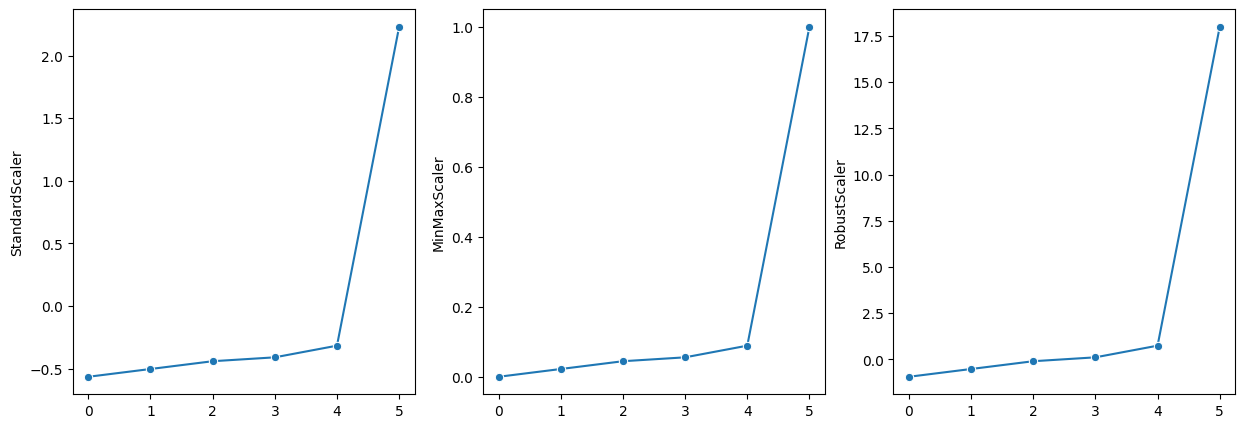

In [10]:
# 이상치가 있는 경우 Scaling 기법 비교

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

df = pd.DataFrame([[10], [12], [14], [15], [18], [100]], columns=['Original'])

df['StandardScaler'] = StandardScaler().fit_transform(df[['Original']])
df['MinMaxScaler'] = MinMaxScaler().fit_transform(df[['Original']])
df['RobustScaler'] = RobustScaler().fit_transform(df[['Original']])

# 표준화
sns.lineplot(df['StandardScaler'], ax=ax[0], marker='o')
# 최대최소정규화
sns.lineplot(df['MinMaxScaler'], ax=ax[1], marker='o')
# 로버스트 스케일링
sns.lineplot(df['RobustScaler'], ax=ax[2], marker='o')

plt.show()

##### 타이타닉 생존율 예측에 필요한 전처리 해보기  **<과제>**

In [16]:
# 데이터 로드
df = pd.read_csv('./data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 전처리 -> 함수로 만들기

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    pass

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    pass

def scaling_feature(train_data, test_data):
    """
    특성 스케일링
    """

SyntaxError: incomplete input (3111783417.py, line 4)

In [18]:
# 전처리 -> 함수로 만들기
# 각 함수는 타이타닉 데이터 전처리의 주요 단계를 담당합니다.

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    # Age 컬럼의 결측치를 평균값으로 대체합니다.
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    # Cabin 컬럼의 결측치를 'N'으로 대체합니다.
    df['Cabin'].fillna('N', inplace=True)
    # Embarked 컬럼의 결측치를 'N'으로 대체합니다.
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    # 분석에 필요 없는 컬럼을 삭제합니다.
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    # LabelEncoder와 OneHotEncoder를 활용한 범주형 변수 인코딩 예시입니다.
    # LabelEncoder: 순서가 없는 범주형 변수(예: Sex, Cabin, Embarked)에 사용 가능
    # OneHotEncoder: 순서가 없는 범주형 변수 중, 머신러닝 모델에 따라 더 효과적일 수 있음

    from sklearn.preprocessing import LabelEncoder, OneHotEncoder

    # Sex 컬럼: LabelEncoder 사용 (0, 1로 변환)
    le_sex = LabelEncoder()
    df['Sex'] = le_sex.fit_transform(df['Sex'])
    # 학습: le_sex.classes_ 속성으로 어떤 값이 0, 1로 매핑됐는지 확인 가능

    # Cabin 컬럼: 우선 첫 글자만 추출 후 LabelEncoder 적용
    df['Cabin'] = df['Cabin'].str[0]
    le_cabin = LabelEncoder()
    df['Cabin'] = le_cabin.fit_transform(df['Cabin'])
    # le_cabin.classes_로 매핑 정보 확인 가능

    # Embarked 컬럼: LabelEncoder 사용
    le_embarked = LabelEncoder()
    df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
    # le_embarked.classes_로 매핑 정보 확인 가능

    # 만약 OneHotEncoder를 사용하고 싶다면 아래와 같이 적용할 수 있습니다.
    # (예시: Embarked 컬럼에 대해 OneHotEncoder 적용)
    # ohe = OneHotEncoder(sparse=False)
    # embarked_ohe = ohe.fit_transform(df[['Embarked']])
    # df[ohe.get_feature_names_out(['Embarked'])] = embarked_ohe
    # df.drop('Embarked', axis=1, inplace=True)

    # 실습 시 LabelEncoder와 OneHotEncoder의 차이와, 모델 성능에 미치는 영향도 비교해보세요.

    return df

def scaling_feature(train_data, test_data):
    """
    특성 스케일링
    - StandardScaler를 사용하여 수치형 특성의 분포를 표준화합니다.
    """
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # 수치형 컬럼만 선택하여 스케일링 적용
    num_features = ['Age', 'SibSp', 'Parch', 'Fare']
    train_data[num_features] = scaler.fit_transform(train_data[num_features])
    test_data[num_features] = scaler.transform(test_data[num_features])
    return train_data, test_data

In [ ]:
# 전처리 함수 호출

In [13]:
# 훈련-테스트 데이터 분리

In [ ]:
# 전처리 함수 호출 및 학습을 위한 데이터 준비 예시
# (아래 코드는 실제 데이터프레임(df)와 train/test 분할이 되어 있다고 가정)
# 1. 범주형 변수 인코딩
df = encode_categorical_features(df)

# 2. 훈련/테스트 데이터 분리 (예시)
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 수치형 변수 스케일링
X_train, X_test = scaling_feature(X_train, X_test)

In [14]:
# Logisticregression 훈련
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logisticregression 훈련
from sklearn.linear_model import LogisticRegression

In [ ]:
# 평가